In [6]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [12,6]

(2000, 1500, 3)


Text(0.5, 1.0, 'Original Image')

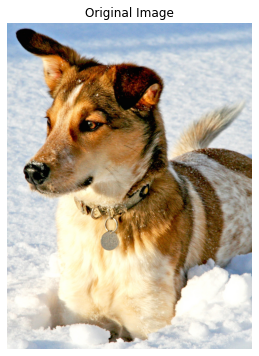

In [16]:
Oimg = imread('dog.jpg')
print(Oimg.shape)
img = plt.imshow(Oimg)
plt.axis('off')
img.set_cmap('gray')
plt.title("Original Image")

In [17]:
Oimg = np.mean(Oimg,-1)                 # Converting to Grayscale

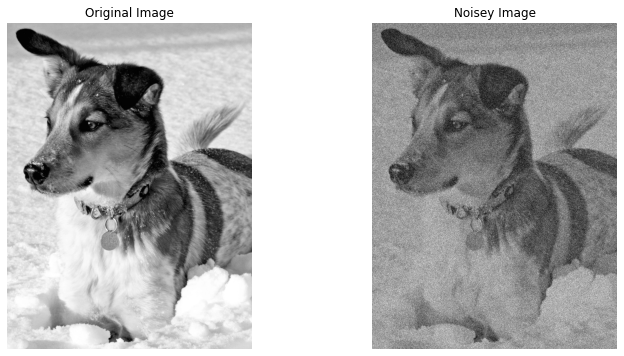

In [18]:

mean = 0
sigma = 3

Noise = np.random.normal(mean, sigma, (Oimg.shape[0],Oimg.shape[1])).astype('uint8')
OimgNoisey = Oimg + Noise           # Add some noise

plt.figure(1)
plt.subplot(121)
img = plt.imshow(Oimg)
plt.axis('off')
img.set_cmap('gray')
plt.title("Original Image")

plt.subplot(122)
img2 = plt.imshow(OimgNoisey)
plt.axis('off')
img2.set_cmap('gray')
plt.title("Noisey Image")
plt.show()

In [9]:
def L2Regularisation(factor, NoiseyInput, ExpectedOutput):
    
    n = len(ExpectedOutput)
    I = np.identity(n)
    A = I
    At = A.T
    AtA = np.matmul(At,A)
    M = (AtA - factor*I)

    T = np.matmul(np.linalg.inv(M),At)
    pred = np.matmul(T,NoiseyInput)

    plt.figure()
    plt.subplot(131)
    img1 = plt.imshow(NoiseyInput)
    img1.set_cmap('gray')
    plt.axis('off')
    plt.title(f'Noisey Image (lambda = {factor})')
    
    plt.subplot(132)
    img2 = plt.imshow(pred)
    img2.set_cmap('gray')
    plt.axis('off')
    plt.title('Denoised Image')
    
    plt.subplot(133)
    img3 = plt.imshow(ExpectedOutput)
    img3.set_cmap('gray')
    plt.axis('off')
    plt.title('Original Image')
    plt.show()

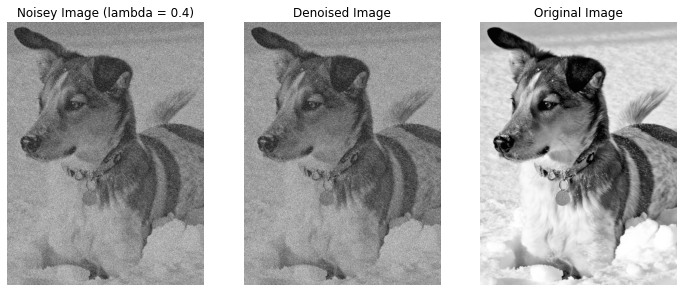

In [21]:
L2Regularisation(0.4,OimgNoisey,Oimg)

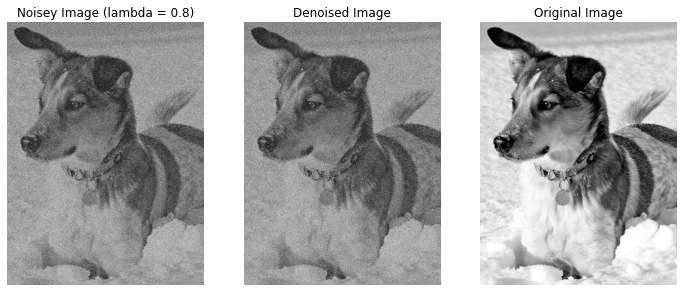

In [22]:
L2Regularisation(0.8,OimgNoisey,Oimg)

In [ ]:
L2Regularisation(1,OimgNoisey,Oimg)

In [ ]:
i=0.2
it = np.arange(i,3,i*2)
for factor in (0,0.2,0.5,0.8,1,1.2,1.4):
    L2Regularisation(factor,OimgNoisey,Oimg)